**Машинное обучение (семинары в записи)**

***Урок 9. Ансамбли на практике***

Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

5. Обучите вашу модель случайного леса на обучающей выборке.

6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.



### РЕШЕНИЕ

Импортируем необходимые библиотеки для работы.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [37]:
# 1. Загрузка набора данных о вине
wine_data = load_wine()

# 2. Преобразование данных в DataFrame для удобства анализа
X = wine_data.data  # Признаки
y = wine_data.target  # Целевая переменная

# Создание DataFrame
wine_df = pd.DataFrame(X, columns=wine_data.feature_names)
wine_df['target'] = y

In [39]:
# Просмотр описания набора данных
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [40]:
# Просмотр первых нескольких строк данных
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [45]:
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

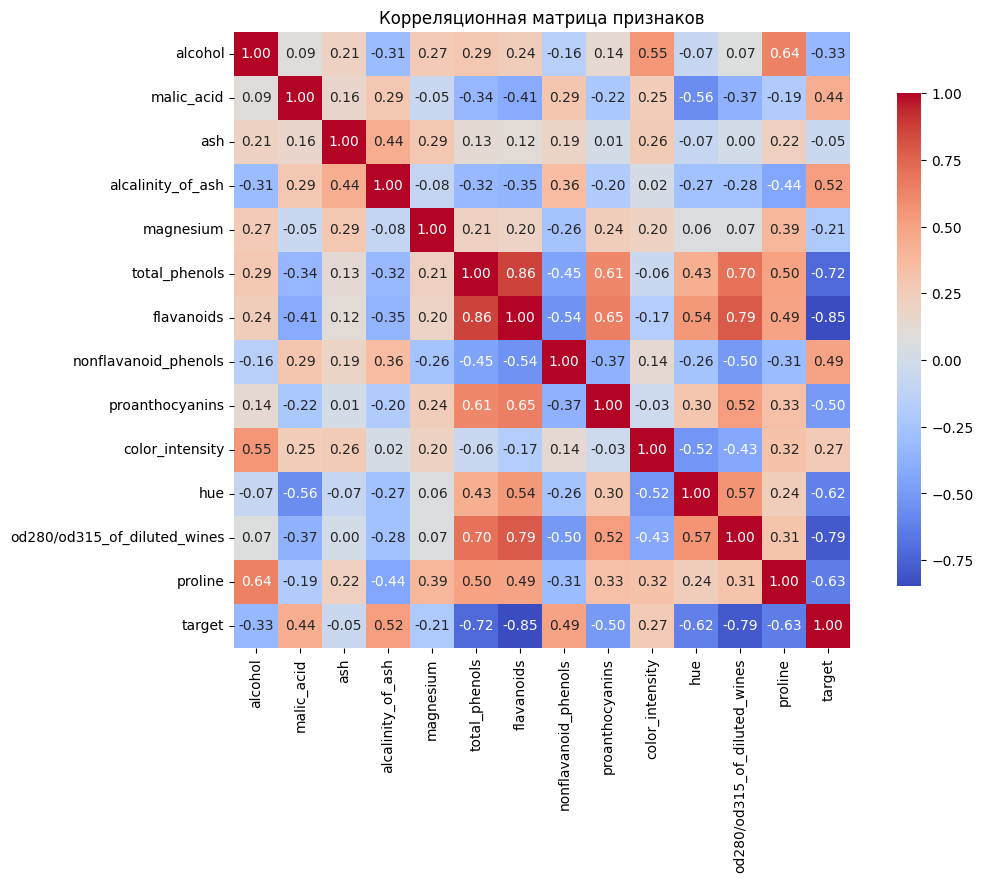

In [46]:
# Создание корреляционной матрицы
correlation_matrix = wine_df.corr()

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица признаков')
plt.show()

In [41]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Проверка размеров выборок
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 142
Размер тестовой выборки: 36


In [47]:
# Определение класса для дерева решений
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Условие остановки
        if len(unique_classes) == 1 or (self.max_depth and depth >= self.max_depth):
            return unique_classes[0]

        # Поиск наилучшего разбиения
        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            return np.random.choice(unique_classes)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)

    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(X, y, feature, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, X, y, feature_index, threshold):
        parent_entropy = self._entropy(y)

        left_indices = X[:, feature_index] < threshold
        right_indices = X[:, feature_index] >= threshold

        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0

        n = len(y)
        n_left = len(y[left_indices])
        n_right = len(y[right_indices])

        child_entropy = (n_left / n) * self._entropy(y[left_indices]) + (n_right / n) * self._entropy(y[right_indices])

        return parent_entropy - child_entropy

    def _entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log(probabilities + 1e-10))

    def predict(self, X):
        return np.array([self._predict(sample) for sample in X])

    def _predict(self, sample):
        node = self.tree
        while isinstance(node, tuple):
            feature_index, threshold, left_tree, right_tree = node
            if sample[feature_index] < threshold:
                node = left_tree
            else:
                node = right_tree
        return node

In [48]:
# Определение класса для случайного леса
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        num_samples = X.shape[0]

        for _ in range(self.n_trees):
            # Выбор случайных образцов с возвращением
            indices = np.random.choice(num_samples, size=num_samples, replace=True)
            X_sampled = X[indices]
            y_sampled = y[indices]

            # Выбор случайных признаков
            features_indices = np.random.choice(X.shape[1], size=int(np.sqrt(X.shape[1])), replace=False)
            X_sampled_reduced = X_sampled[:, features_indices]

            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sampled_reduced, y_sampled)
            self.trees.append((tree, features_indices))

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X[:, features]) for tree, features in self.trees])

        # Голосование по предсказаниям деревьев
        return [np.bincount(tree_preds).argmax() for tree_preds in tree_predictions.T]

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Обучение модели случайного леса
rf_model = RandomForest(n_trees=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Оценка производительности модели на тестовой выборке
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### Объяснение:

1. **Класс `DecisionTree`:**
   - Метод `fit` обучает дерево, создавая рекурсивно его структуру, выбирая наилучшее разбиение по критерию Джини.
   - Метод `_build_tree` строит дерево.
   - Метод `_predict_sample` предсказывает класс для отдельного наблюдения.
   
2. **Класс `RandomForest`:**
   - Метод `fit` создает несколько деревьев, обучая каждое из них на бутстрэппированной выборке.
   - Метод `predict` собирает предсказания всех деревьев и использует голосование для определения итогового класса.

3. **Обучение и оценка:**
   - Набор данных Iris загружается, разбивается на обучающую и тестовую выборки.
   - Модель случайного леса обучается и оценивается с использованием метрик точности, точности, полноты и F1-меры.

### Сравнение с стандартной реализацией

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_sklearn = RandomForestClassifier(n_estimators=100, random_state=42)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

In [53]:
# Оценка производительности стандартной модели
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy стандартной модели: {accuracy_sklearn:.4f}')
print(classification_report(y_test, y_pred_sklearn))

Accuracy стандартной модели: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Достигнутая точность 1.0000 (или 100%) означает, что наша модель правильно классифицировала все примеры в тестовой выборке.

**Анализ результатов:**

- Accuracy (Точность): 1.0000 означает, что модель правильно предсказала все 36 наблюдений в тестовой выборке.
- Precision (Точность): для каждого класса (0, 1, 2) значение 1.00 указывает на то, что все предсказания этого класса были верными. То есть, когда модель предсказывает класс, она всегда оказывается права.
- Recall (Полнота): значение 1.00 для каждого класса говорит о том, что модель смогла обнаружить все истинные примеры этого класса в тестовой выборке.
- F1-Score: значение 1.00 для каждого класса указывает на то, что модель достигла идеального баланса между точностью и полнотой.
- Support (Поддержка): это количество истинных примеров для каждого класса в тестовой выборке: Класс 0: 14; Класс 1: 14; Класс 2: 8
- Macro Average: средние значения по всем классам для точности, полноты и F1-меры также равны 1.00, что подтверждает высокую производительность модели.
- Weighted Average: это усредненные значения с учетом количества экземпляров в каждом классе. Поскольку точность для всех классов равна 1.00, взвешенные средние также равны 1.00.

**Вывод**

Такие отличные результаты, скорее всего, связаны со слеющими факторами:

- Простота данных: если данные о вине имеют четкие границы между классами и не содержат сложных паттернов, это может привести к высокой точности.
- маленький размер выборки: eсли тестовая выборка небольшая, это может привести к переобучению модели.
- отсутствие шума в данных: если данные чистые и хорошо подготовленные, это также способствует хорошим результатам.

Видно, что результаты в двух случаях получились одинаковыми. Для практики, по умолчанию быстрее и легче использовать стандартную реализацию.